# Import libraries

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from mpl_toolkits import mplot3d

In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [3]:
path_to_save = './../results/02a_visualization/'

# Loading data

## Train data (*smoothed & scaled*)

In [4]:
path_to_ftir_data = './../data/preprocessed_data/ftir_scaled_train.csv'

In [5]:
data = pd.read_csv(path_to_ftir_data, index_col=0)

print(data.shape)
data.head(3)

(26, 1142)


0            1            2            3            4  \
wavenumber  1900.766600  1899.802230  1898.837870  1897.873500  1896.909130   
1              0.000494     0.000944     0.001362     0.001750     0.002112   
2              0.000210     0.000215     0.000213     0.000205     0.000192   

                      5            6            7            8            9  \
wavenumber  1895.944770  1894.980400  1894.016030  1893.051670  1892.087300   
1              0.002451     0.002770     0.003074     0.003364     0.003646   
2              0.000175     0.000155     0.000132     0.000109     0.000085   

                     10           11           12           13           14  \
wavenumber  1891.122930  1890.158570  1889.194200  1888.229830  1887.265470   
1              0.003921     0.004193     0.004467     0.004744     0.005028   
2              0.000063     0.000042     0.000025     0.000011     0.000003   

                     15           16           17           18          19  \
wavenumber  1886.301100  1885.336730  1884.372370  1883.408000  1882.44364   
1              0.005324     0.005633     0.005960     0.006308     0.00668   
2              0.000000     0.000004     0.000017     0.000039     0.00007   

                     20           21           22           23           24  \
wavenumber  1881.479270  1880.514900  1879.550540  1878.586170  1877.621800   
1              0.007079     0.007509     0.007974     0.008476     0.009019   
2              0.000113     0.000168     0.000236     0.000318     0.000415   

            ...        1117        1118        1119        1120        1121  \
wavenumber  ...  823.569090  822.604720  821.640360  820.675990  819.711620   
1           ...    0.037121    0.035323    0.033560    0.031835    0.030152   
2           ...    0.072690    0.071565    0.070364    0.069083    0.067721   

                  1122        1123        1124        1125        1126  \
wavenumber  818.747260  817.782890  816.818520  815.854160  814.889790   
1             0.028514    0.026926    0.025390    0.023910    0.022491   
2             0.066275    0.064743    0.063123    0.061413    0.059610   

                  1127        1128        1129        1130        1131  \
wavenumber  813.925420  812.961060  811.996690  811.032320  810.067960   
1             0.021135    0.019846    0.018627    0.017483    0.016417   
2             0.057713    0.055719    0.053626    0.051432    0.049135   

                  1132        1133        1134        1135        1136  \
wavenumber  809.103590  808.139230  807.174860  806.210490  805.246130   
1             0.015433    0.014533    0.013723    0.013004    0.012382   
2             0.046732    0.044221    0.041600    0.038868    0.036021   

                  1137        1138        1139        1140        1141  
wavenumber  804.281760  803.317390  802.353030  801.388660  800.424290  
1             0.011859    0.011440    0.011127    0.010924    0.010836  
2             0.033058    0.029976    0.026773    0.023447    0.019997  

[3 rows x 1142 columns]

## Samples description

In [6]:
path_to_samples_description = './../data/preprocessed_data/ftir_description.csv'

In [7]:
samples_description = pd.read_csv(path_to_samples_description, index_col=0)

samples_description.index = samples_description.index.astype(str)

print(samples_description.shape)
samples_description.head(3)

(29, 4)


Description  Type  Class  Label
1                    MFGO, разб. 1:20  $GO$      1  Train
2           HGO, 0.0116 г в 25 мл H2O  $GO$      1  Train
3  GO, RusGraphene, 2 г в 1000 мл H2O  $GO$      1  Train

# Data visualization

## Selecting *train* part of sample `samples_description` 

In [8]:
type_color_dict = {
    '$GO$': 'dodgerblue',
    '$rGO$': 'orange',
    '$GO_{d}$': 'green'
}

type_dict = {
    '$rGO$': '$вОГ$',
    '$GO$': '$ОГ$',
    '$GO_{d}$': '$ОГ_{диализ}$'
}

In [9]:
samples_description = samples_description.loc[samples_description['Label'] == 'Train']

print(samples_description.shape)
samples_description.head(3)

(25, 4)


Description  Type  Class  Label
1                    MFGO, разб. 1:20  $GO$      1  Train
2           HGO, 0.0116 г в 25 мл H2O  $GO$      1  Train
3  GO, RusGraphene, 2 г в 1000 мл H2O  $GO$      1  Train

## Smoothed and scaled spectra for each class (*3D-plot*)

In [10]:
wavenumber = data.loc['wavenumber']

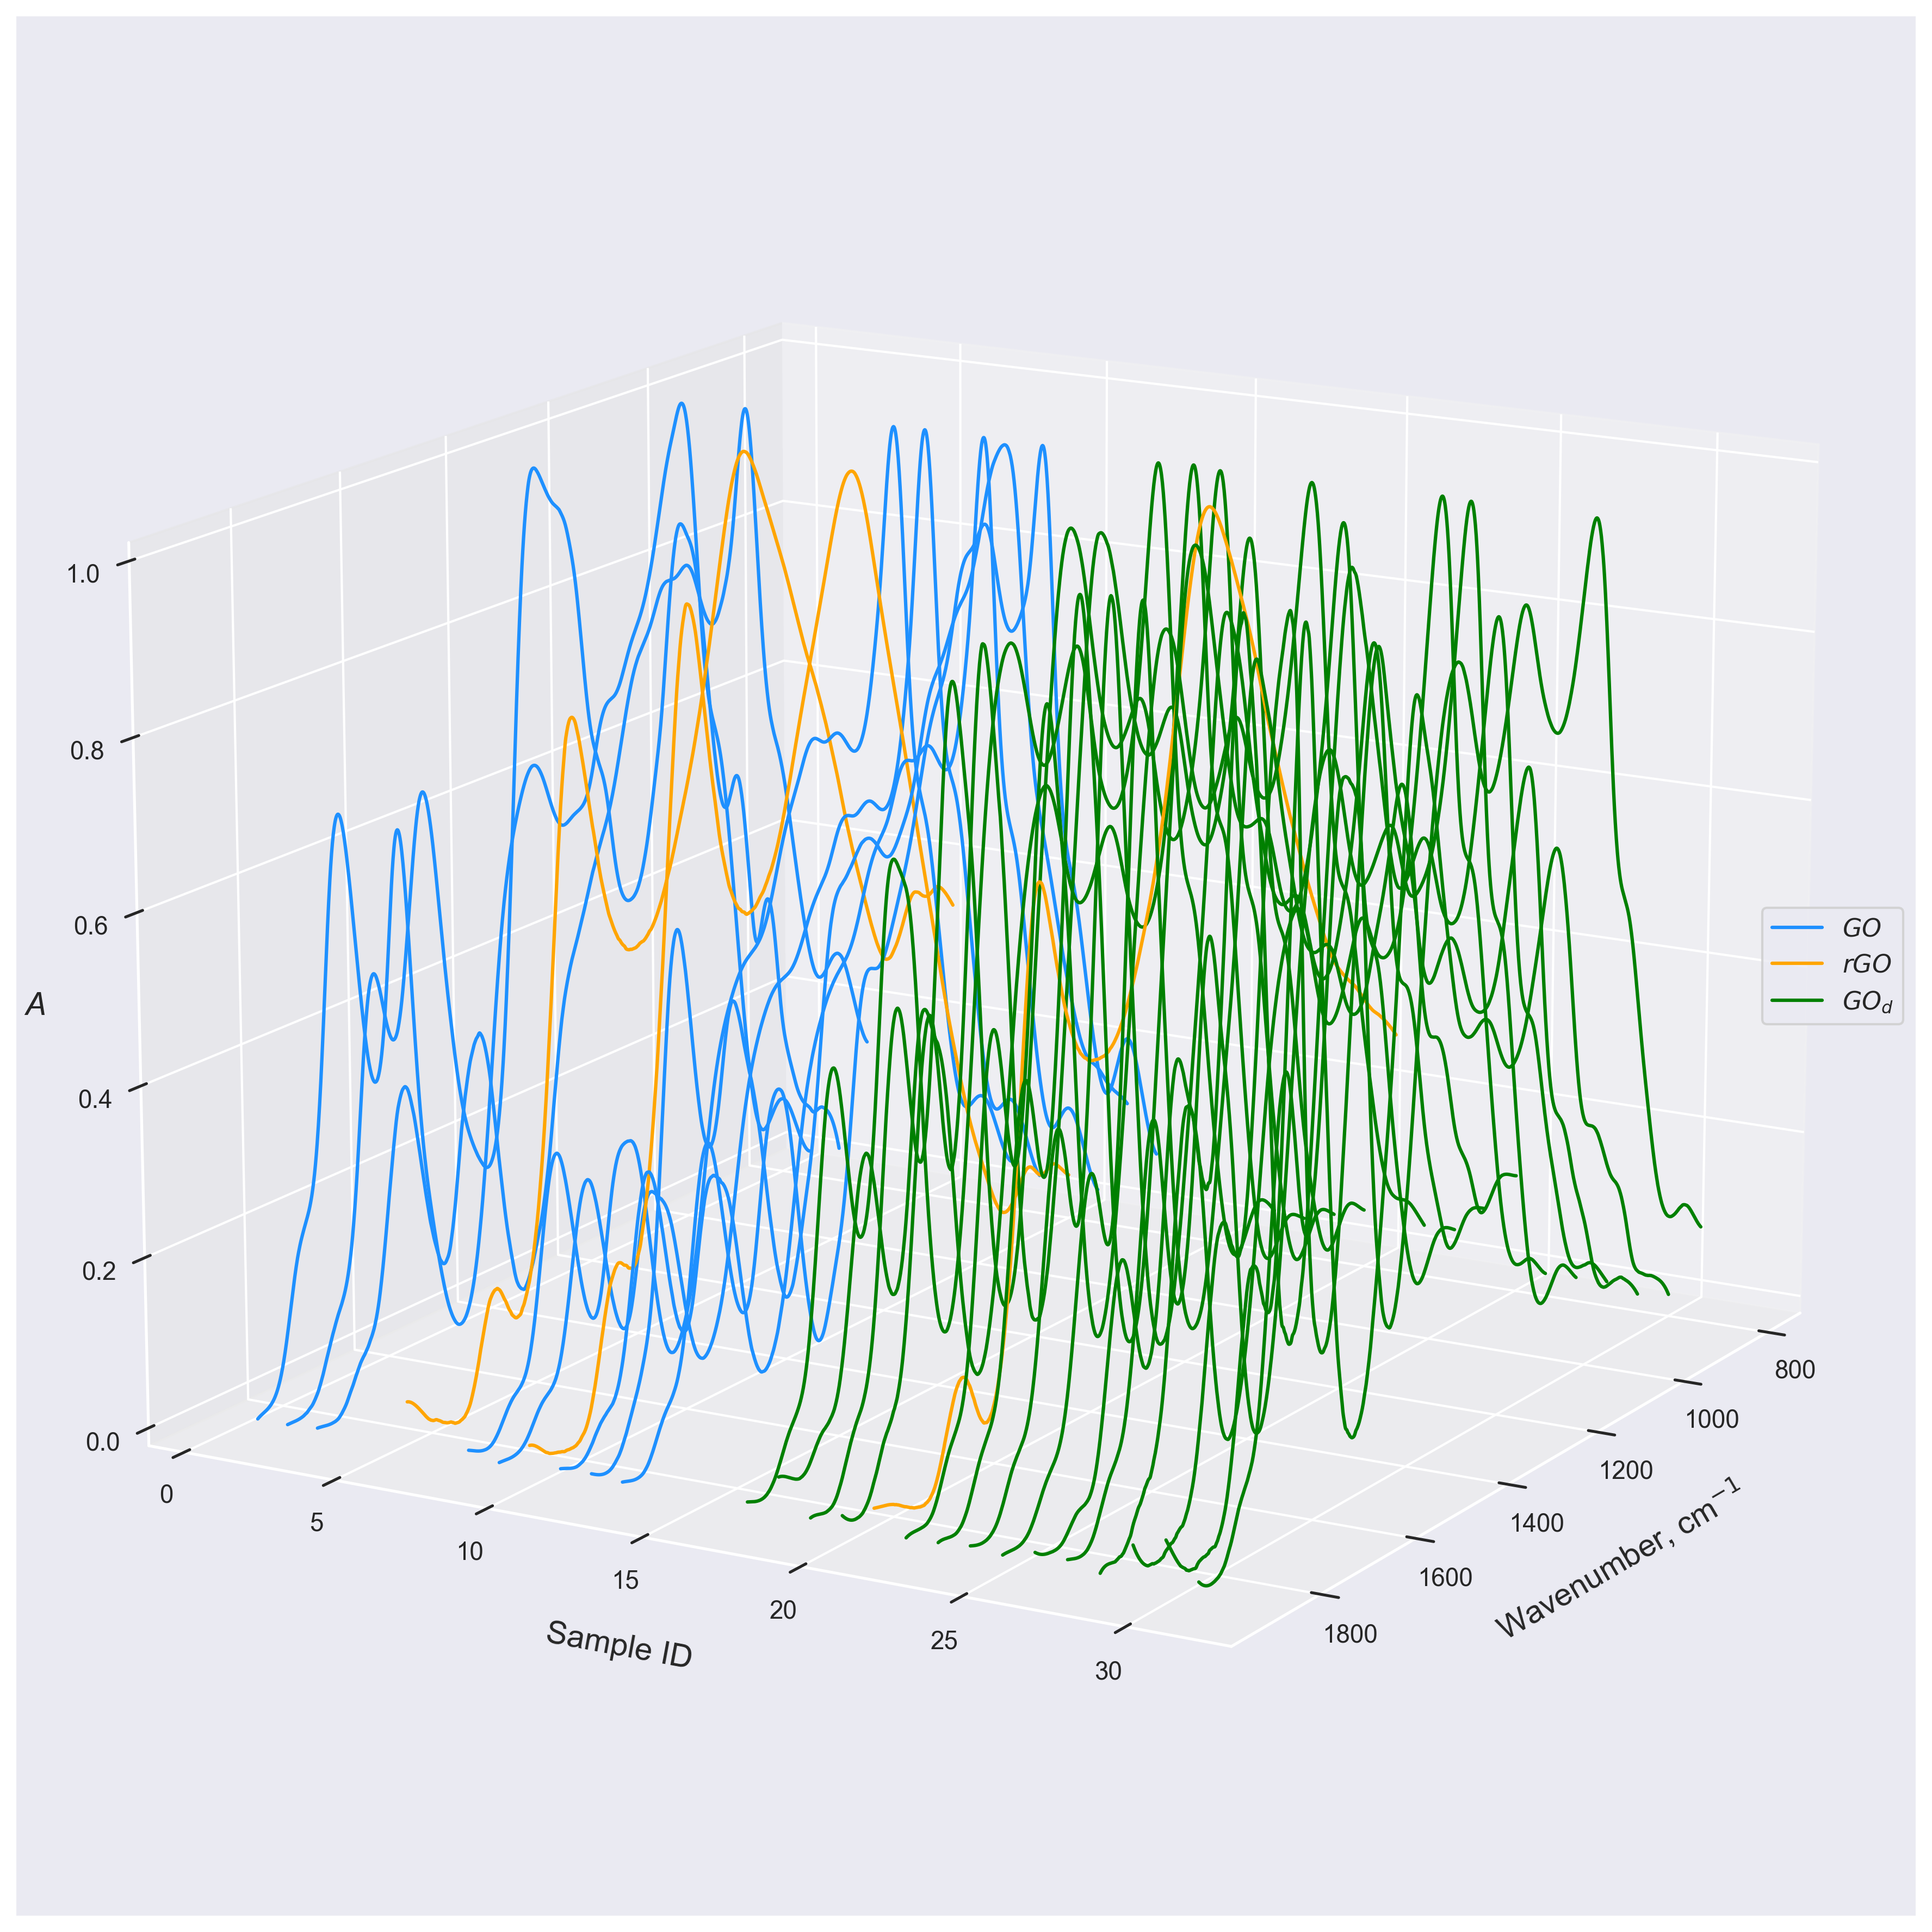

In [11]:
fontsize = 14

sns.set_theme()

fig = plt.figure(figsize=(12, 12), dpi=300)
ax = plt.axes(projection='3d')

for index in data.index[1:]:
    type = samples_description.loc[index]['Type']
    color = type_color_dict[type]

    x = wavenumber
    y = [int(index)] * data.shape[1]
    z = data.loc[index]
    
    ax.plot(x, y, z, color=color, linewidth=1.5, label=type)

ax.set_xlabel('Wavenumber, cm$^{-1}$', fontstyle='normal', fontsize=fontsize, labelpad=15)
ax.set_ylabel('Sample ID', fontstyle='normal', fontsize=fontsize, labelpad=15)
ax.set_zlabel('A', fontstyle='italic', fontsize=fontsize, labelpad=5, rotation=0)

# only unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='center right')

plt.tight_layout()

ax.view_init(elev=15, azim=30, roll=0)

plt.savefig(f'{path_to_save}/3d_spectra_visualization.png', dpi=600)

plt.show()

## Principal spectra of 3 *GO* types

In [12]:
x = data.loc['wavenumber']

go_spectrum = data.loc['8']
rgo_spectrum = data.loc['10']
god_spectrum = data.loc['22']

### 2D-visualization

In [13]:
bands_highlighting = True
delta = 50

text_fontsize = 11
coef_top = 0.98
coef = 0.01

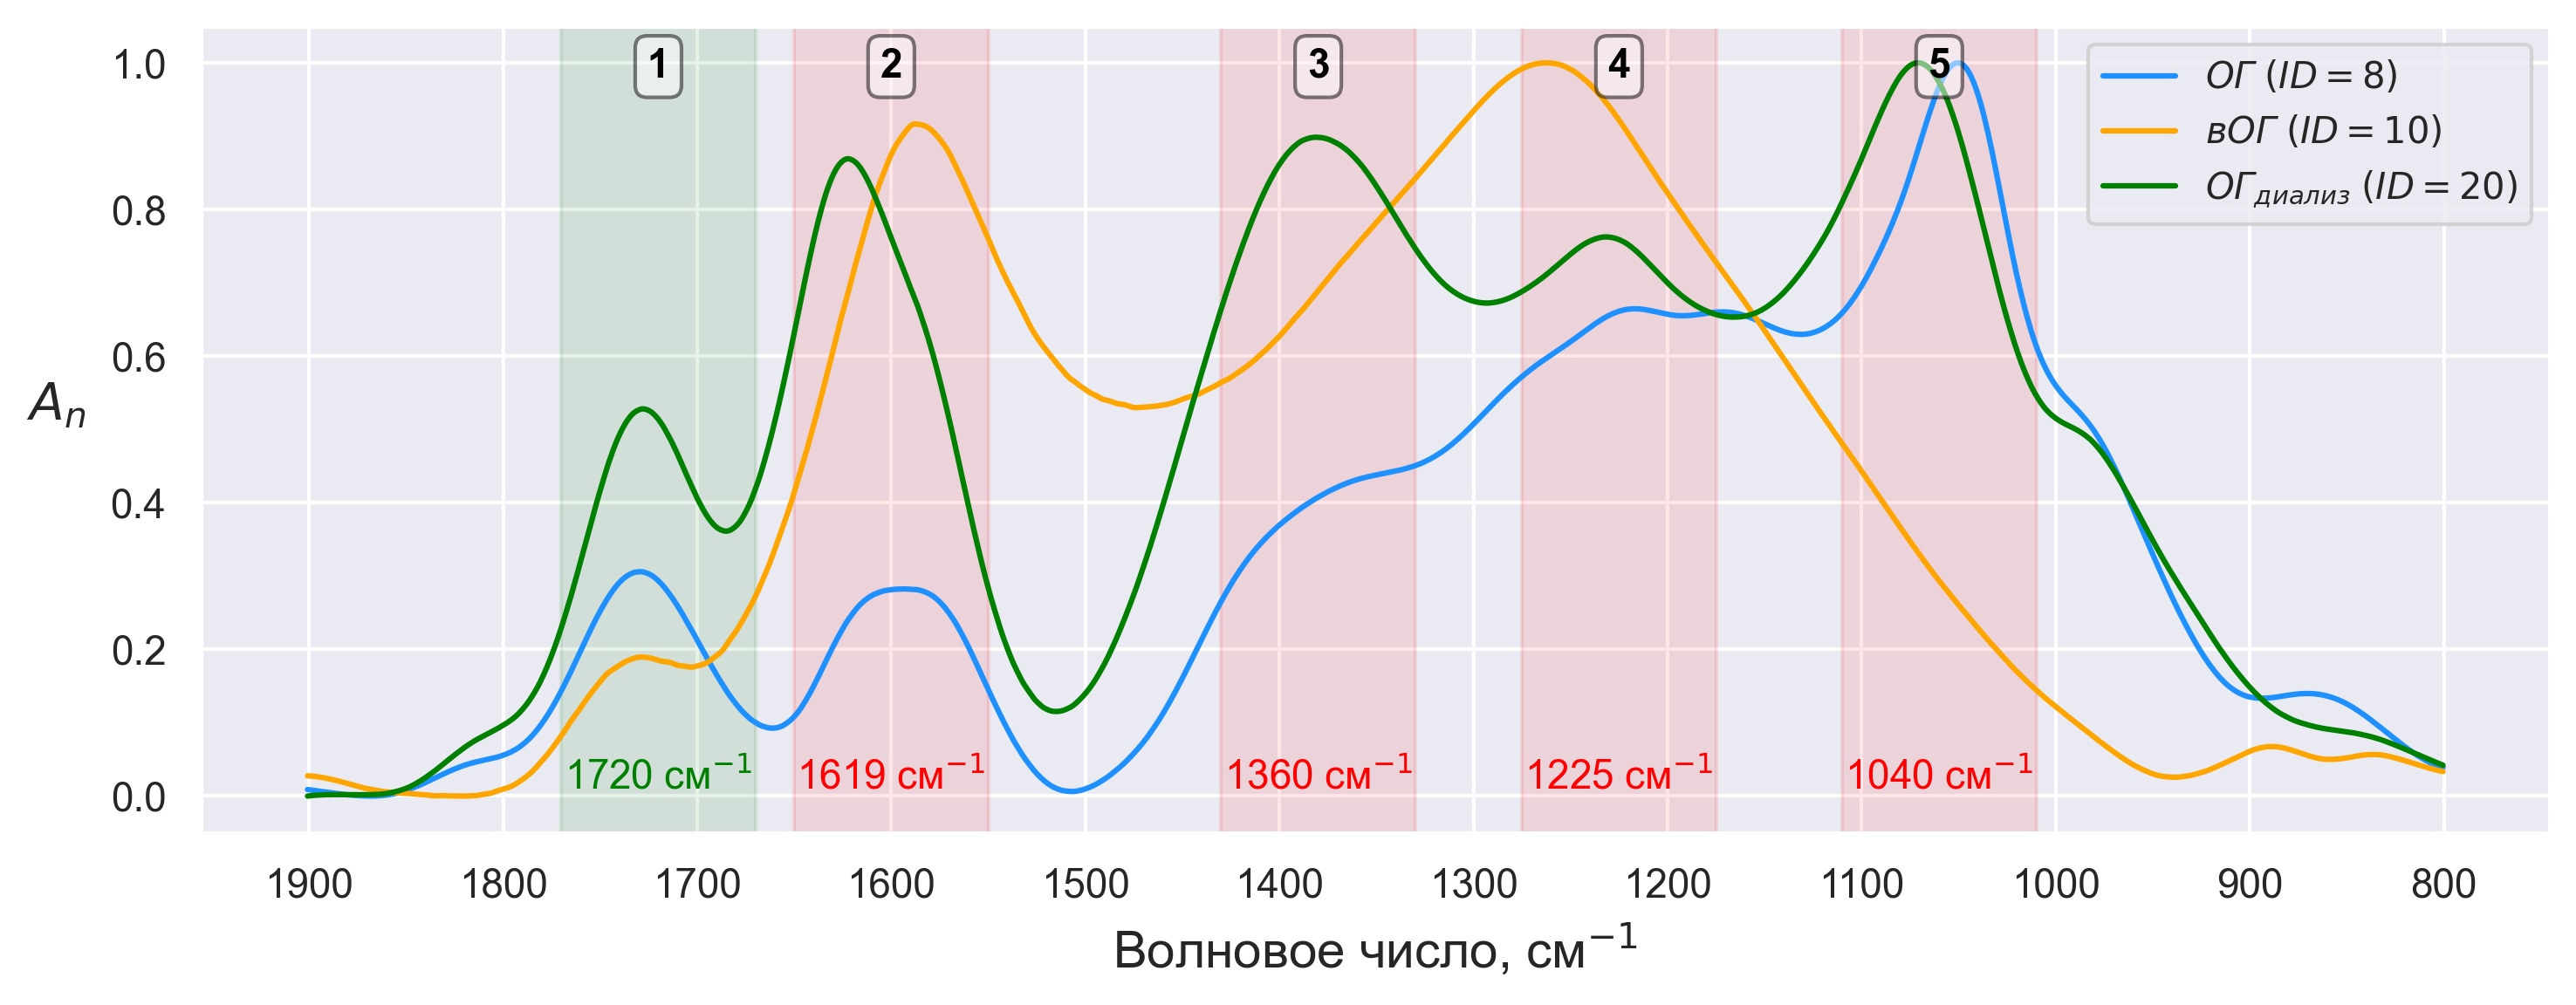

In [14]:
fontsize = 14

sns.set_theme()

fig = plt.figure(figsize=(10, 4), dpi=300)
ax = fig.gca()

ax.plot(x, go_spectrum, color='dodgerblue', label='$ОГ$ $(ID = 8)$')
ax.plot(x, rgo_spectrum, color='orange', label='$вОГ$ $(ID = 10)$')
ax.plot(x, god_spectrum, color='green', label='$ОГ_{диализ}$ $(ID = 20)$')

ax.set_xlabel('Волновое число, см$^{-1}$', fontstyle='normal', fontsize=fontsize, labelpad=5)
ax.set_ylabel('$A_{n}$', fontstyle='italic', fontsize=fontsize, labelpad=15, rotation=0)

ax.invert_xaxis()

ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

if bands_highlighting:
    # Band №1 (1720)
    band = 1720
    ax.axvspan(band-delta, band+delta, color='green', linewidth=1.0, alpha=0.1)
    ax.text(band, max(go_spectrum) * coef, '1720 см$^{-1}$', fontsize=text_fontsize, color='green', ha='center')
    ax.text(band, max(go_spectrum) * coef_top, '1', fontsize=text_fontsize, fontweight='bold', color='black', ha='center',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.3', linewidth=1))

    # Band №2 (1619)
    band = 1600
    ax.axvspan(band-delta, band+delta, color='red', linewidth=1.0, alpha=0.1)
    ax.text(band, max(go_spectrum) * coef, '1619 см$^{-1}$', fontsize=text_fontsize, color='red', ha='center')
    ax.text(band, max(go_spectrum) * coef_top, '2', fontsize=text_fontsize, fontweight='bold', color='black', ha='center',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.3', linewidth=1))

    # Band №3 (1360)
    band = 1380
    ax.axvspan(band-delta, band+delta, color='red', linewidth=1.0, alpha=0.1)
    ax.text(band, max(go_spectrum) * coef, '1360 см$^{-1}$', fontsize=text_fontsize, color='red', ha='center')
    ax.text(band, max(go_spectrum) * coef_top, '3', fontsize=text_fontsize, fontweight='bold', color='black', ha='center',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.3', linewidth=1))

    # Band №4 (1225)
    band = 1225
    ax.axvspan(band-delta, band+delta, color='red', linewidth=1.0, alpha=0.1)
    ax.text(band, max(go_spectrum) * coef, '1225 см$^{-1}$', fontsize=text_fontsize, color='red', ha='center')
    ax.text(band, max(go_spectrum) * coef_top, '4', fontsize=text_fontsize, fontweight='bold', color='black', ha='center',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.3', linewidth=1))

    # Band №5 (1040)
    band = 1060
    ax.axvspan(band-delta, band+delta, color='red', linewidth=1.0, alpha=0.1)
    ax.text(band, max(go_spectrum) * coef, '1040 см$^{-1}$', fontsize=text_fontsize, color='red', ha='center')
    ax.text(band, max(go_spectrum) * coef_top, '5', fontsize=text_fontsize, fontweight='bold', color='black', ha='center',
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.5, boxstyle='round,pad=0.3', linewidth=1))

ax.legend(loc='best', fontsize=10)

plt.tight_layout()

plt.savefig(f'{path_to_save}/lineplot_princripal_spectra.png', dpi=600)

plt.show()

### Same visualization for *graphical abstract*

In [15]:
path_to_graphical_abstract = './../../../../smth_else/graphical_abstract'

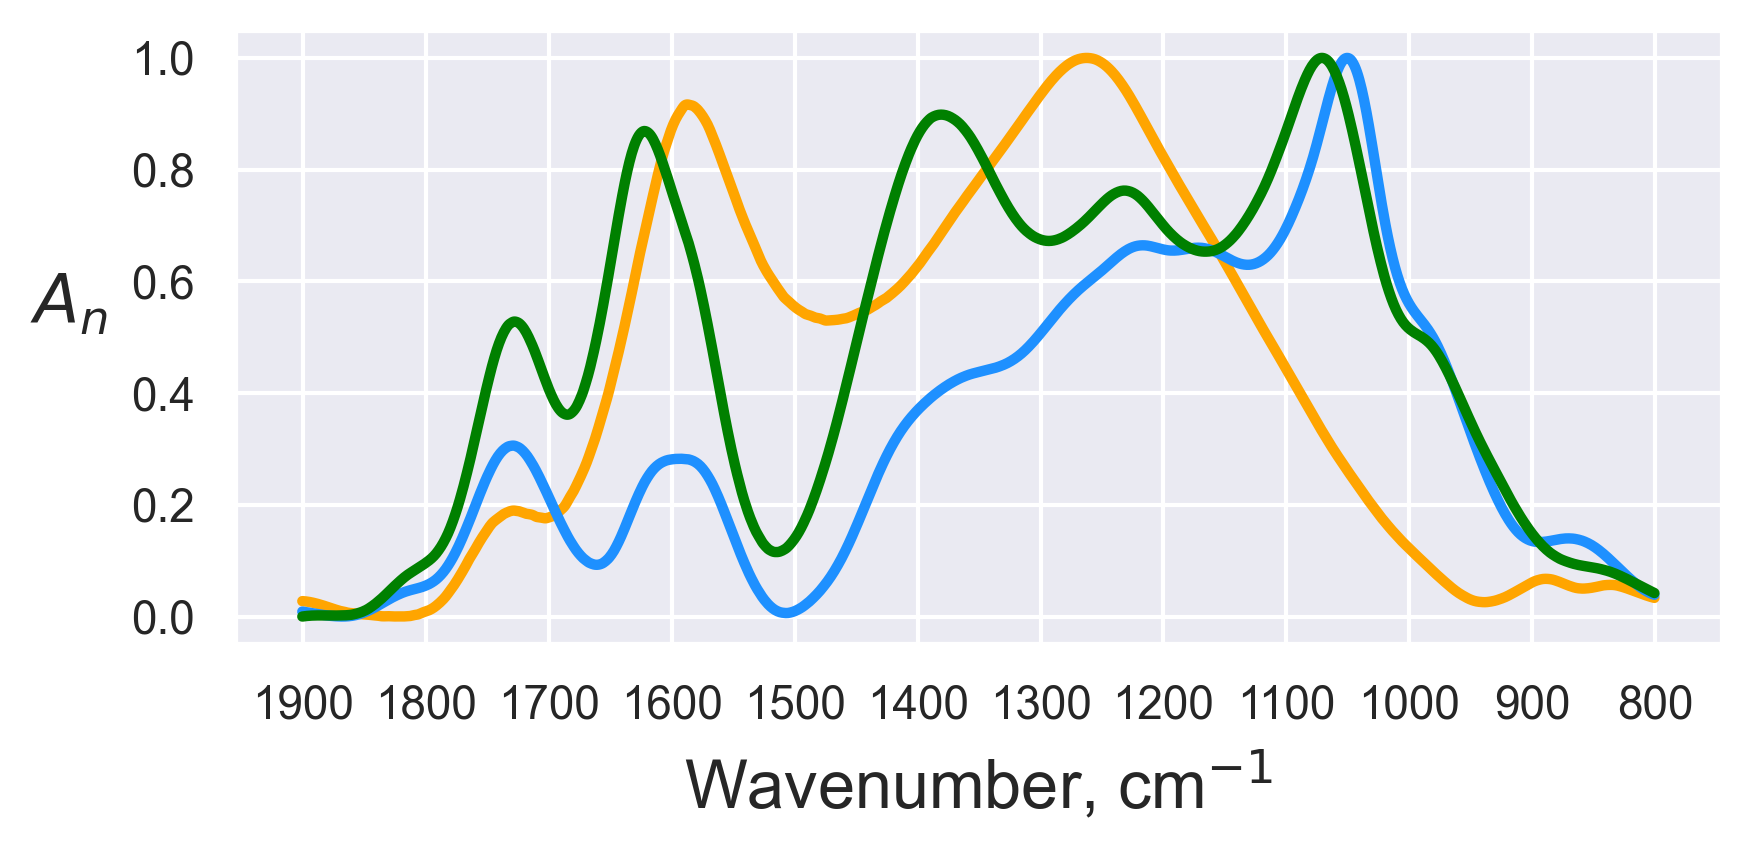

In [16]:
fontsize = 16
linewidth = 2.5

sns.set_theme()

fig = plt.figure(figsize=(6, 3), dpi=300)
ax = fig.gca()

ax.plot(x, rgo_spectrum, color='orange', linewidth=linewidth, label='$rGO$ $(id = 10)$')
ax.plot(x, go_spectrum, color='dodgerblue', linewidth=linewidth, label='$GO$ $(id = 9)$')
ax.plot(x, god_spectrum, color='green', linewidth=linewidth, label='$GO_{d}$ $(id = 23)$')

ax.set_xlabel('Wavenumber, cm$^{-1}$', fontstyle='normal', fontsize=fontsize, labelpad=5)
ax.set_ylabel('$A_{n}$', fontstyle='italic', fontsize=fontsize, labelpad=15, rotation=0)

ax.invert_xaxis()

ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

# ax.legend(loc='best')

plt.tight_layout()

plt.savefig(f'{path_to_graphical_abstract}/2d_princripal_spectra.png', dpi=600)

plt.show()

## Spectra of all samples for each class (3 subplots)

In [17]:
fontsize = 14

wavenumber = data.loc['wavenumber']
unique_types = samples_description['Type'].unique()

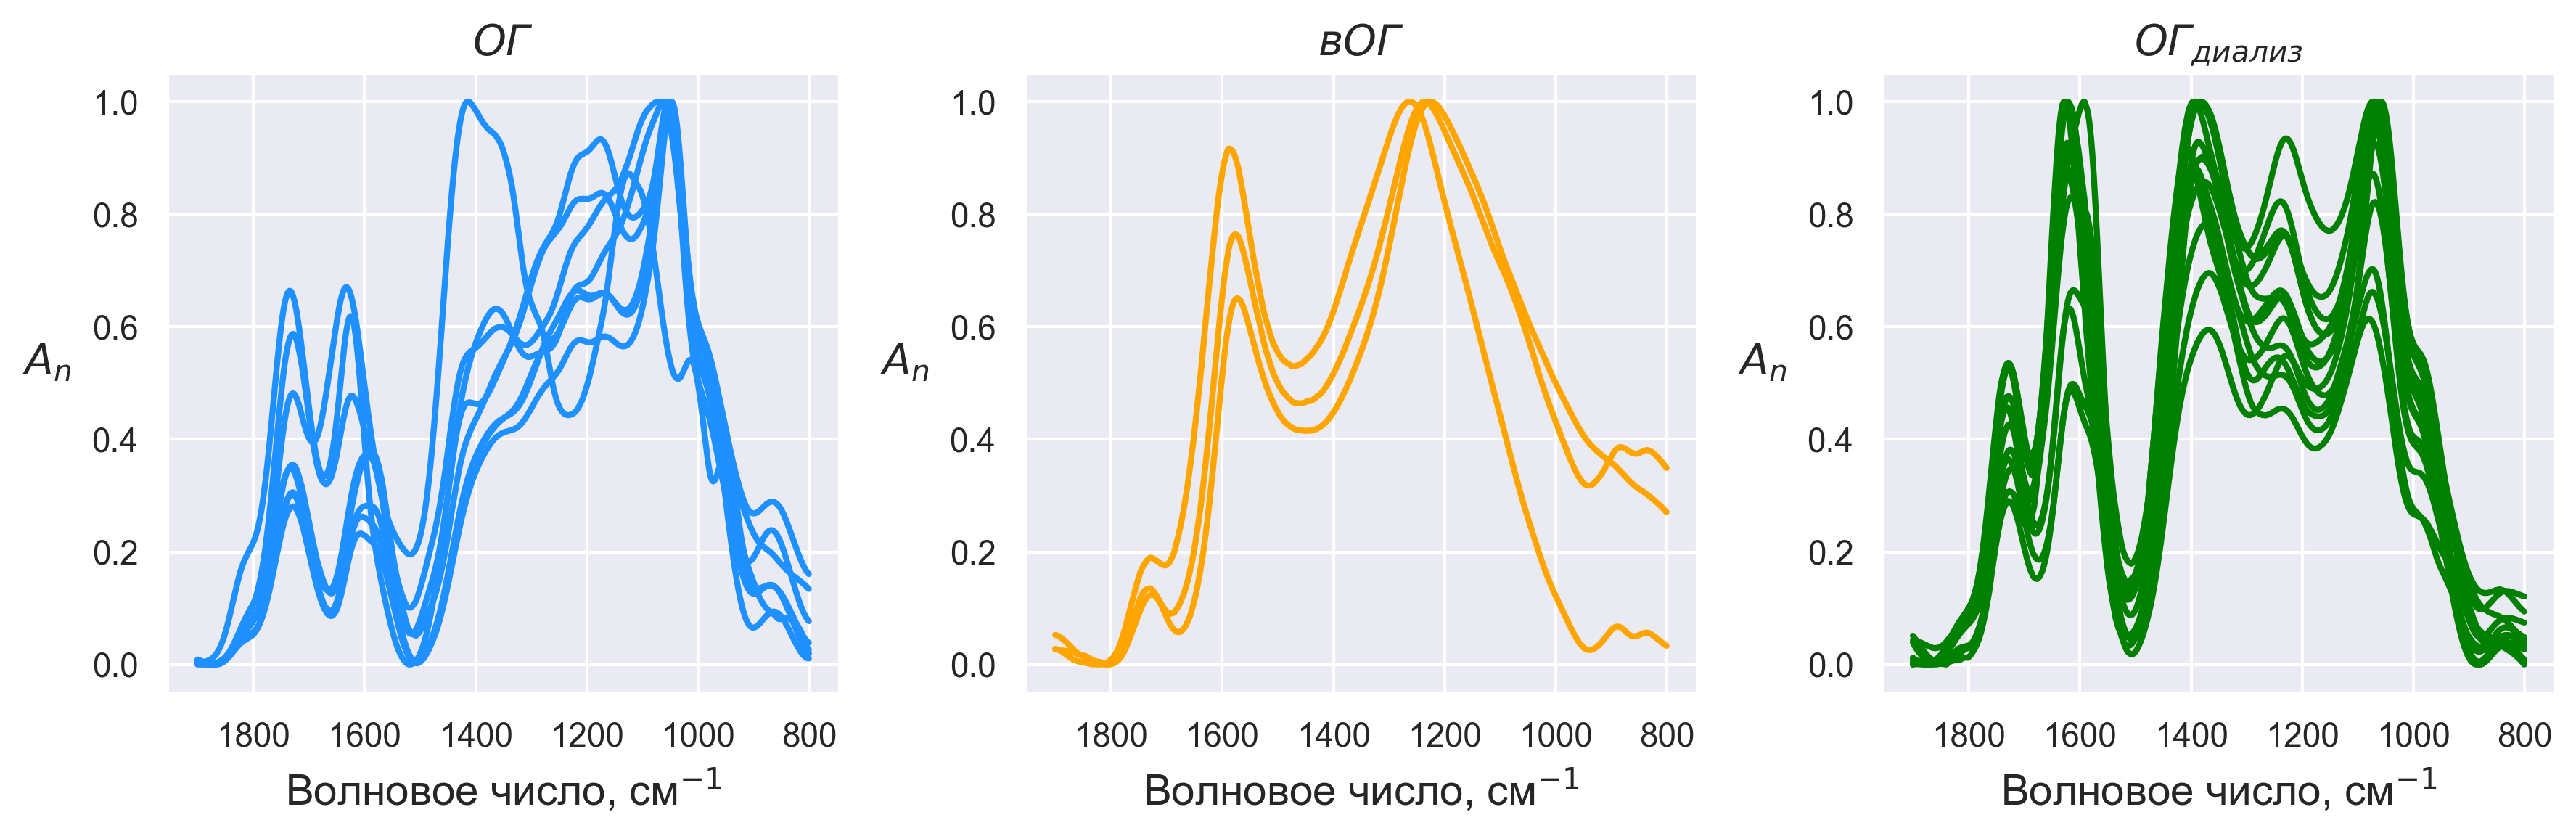

In [57]:
sns.set_theme()

nrows = 1
ncols = 3

fig = plt.figure(figsize=(12, 4), dpi=300)

for i, type in enumerate(unique_types):
    type_indexes = samples_description.loc[samples_description['Type'] == type].index
    hue = samples_description.loc[type_indexes]
    data_type = data.loc[type_indexes]

    color = type_color_dict[type]

    ax = plt.subplot(nrows, ncols, i+1)

    for i in type_indexes:
        spectrum = data_type.loc[i]
        ax.plot(
            wavenumber,
            spectrum,
            color=color,
            linewidth=2.0,
            label=type
        )

    ax.set_title(
        type_dict[type],
        fontstyle='normal',
        fontsize=fontsize,
        fontweight='bold',
    )
    
    ax.set_xlabel(
        'Волновое число, см$^{-1}$',
        fontstyle='normal',
        fontsize=fontsize,
        labelpad=5
    )
    ax.set_ylabel(
        '$A_{n}$',
        fontstyle='italic',
        fontsize=fontsize,
        labelpad=15,
        rotation=0
    )

    ax.set
    
    ax.invert_xaxis()

    ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
        
plt.tight_layout()

plt.savefig(f'{path_to_save}/spectra_subplots_by_type.png', dpi=600)

plt.show()

## Heat Map visualization

### Data wrangling

In [19]:
# heatmap data processing
heatmap_data = data.copy().loc['1':]
heatmap_data.columns = [round(wave) for wave in data.loc['wavenumber'].tolist()]
heatmap_data = heatmap_data.loc[:, 1900:]

# sorting indexes by sample type (GO, rGO, GOd)
indexes = []
unique_types = sorted(samples_description['Type'].unique())
for type in unique_types:
    type_indexes = samples_description.loc[samples_description['Type'] == type].index
    indexes.extend(type_indexes)

# reindexing heatmap dataframe
heatmap_data = heatmap_data.reindex(indexes)
heatmap_data.head(3)

1900      1899      1898      1897      1896      1895      1894  \
1  0.000944  0.001362  0.001750  0.002112  0.002451  0.002770  0.003074   
2  0.000215  0.000213  0.000205  0.000192  0.000175  0.000155  0.000132   
3  0.002476  0.002405  0.002323  0.002230  0.002128  0.002017  0.001899   

       1893      1892      1891      1890      1889      1888      1887  \
1  0.003364  0.003646  0.003921  0.004193  0.004467  0.004744  0.005028   
2  0.000109  0.000085  0.000063  0.000042  0.000025  0.000011  0.000003   
3  0.001776  0.001648  0.001517  0.001383  0.001250  0.001116  0.000985   

       1886      1885      1884      1883      1882      1881      1881  \
1  0.005324  0.005633  0.005960  0.006308  0.006680  0.007079  0.007509   
2  0.000000  0.000004  0.000017  0.000039  0.000070  0.000113  0.000168   
3  0.000856  0.000732  0.000613  0.000501  0.000397  0.000303  0.000218   

       1880      1879      1878      1877  ...      824       823       822   \
1  0.007974  0.008476  0.009019  0.009606  ...  0.037121  0.035323  0.033560   
2  0.000236  0.000318  0.000415  0.000529  ...  0.072690  0.071565  0.070364   
3  0.000146  0.000087  0.000042  0.000013  ...  0.208237  0.205610  0.203011   

       821       820       819       818       817       816       815   \
1  0.031835  0.030152  0.028514  0.026926  0.025390  0.023910  0.022491   
2  0.069083  0.067721  0.066275  0.064743  0.063123  0.061413  0.059610   
3  0.200442  0.197910  0.195416  0.192967  0.190564  0.188213  0.185918   

       814       813       812       811       810       809       808   \
1  0.021135  0.019846  0.018627  0.017483  0.016417  0.015433  0.014533   
2  0.057713  0.055719  0.053626  0.051432  0.049135  0.046732  0.044221   
3  0.183681  0.181509  0.179403  0.177369  0.175410  0.173531  0.171735   

       807       806       805       804       803       802       801   \
1  0.013723  0.013004  0.012382  0.011859  0.011440  0.011127  0.010924   
2  0.041600  0.038868  0.036021  0.033058  0.029976  0.026773  0.023447   
3  0.170026  0.168408  0.166886  0.165463  0.164143  0.162931  0.161829   

       800   
1  0.010836  
2  0.019997  
3  0.160843  

[3 rows x 1141 columns]

### Heat Map of all spectra for each class (3 subplots)

In [20]:
fontsize = 12
fontstyle='normal'

type_cmap = {
    '$GO$': 'Blues',
    '$GO_{d}$': 'Greens',
    '$rGO$': 'Oranges'
}

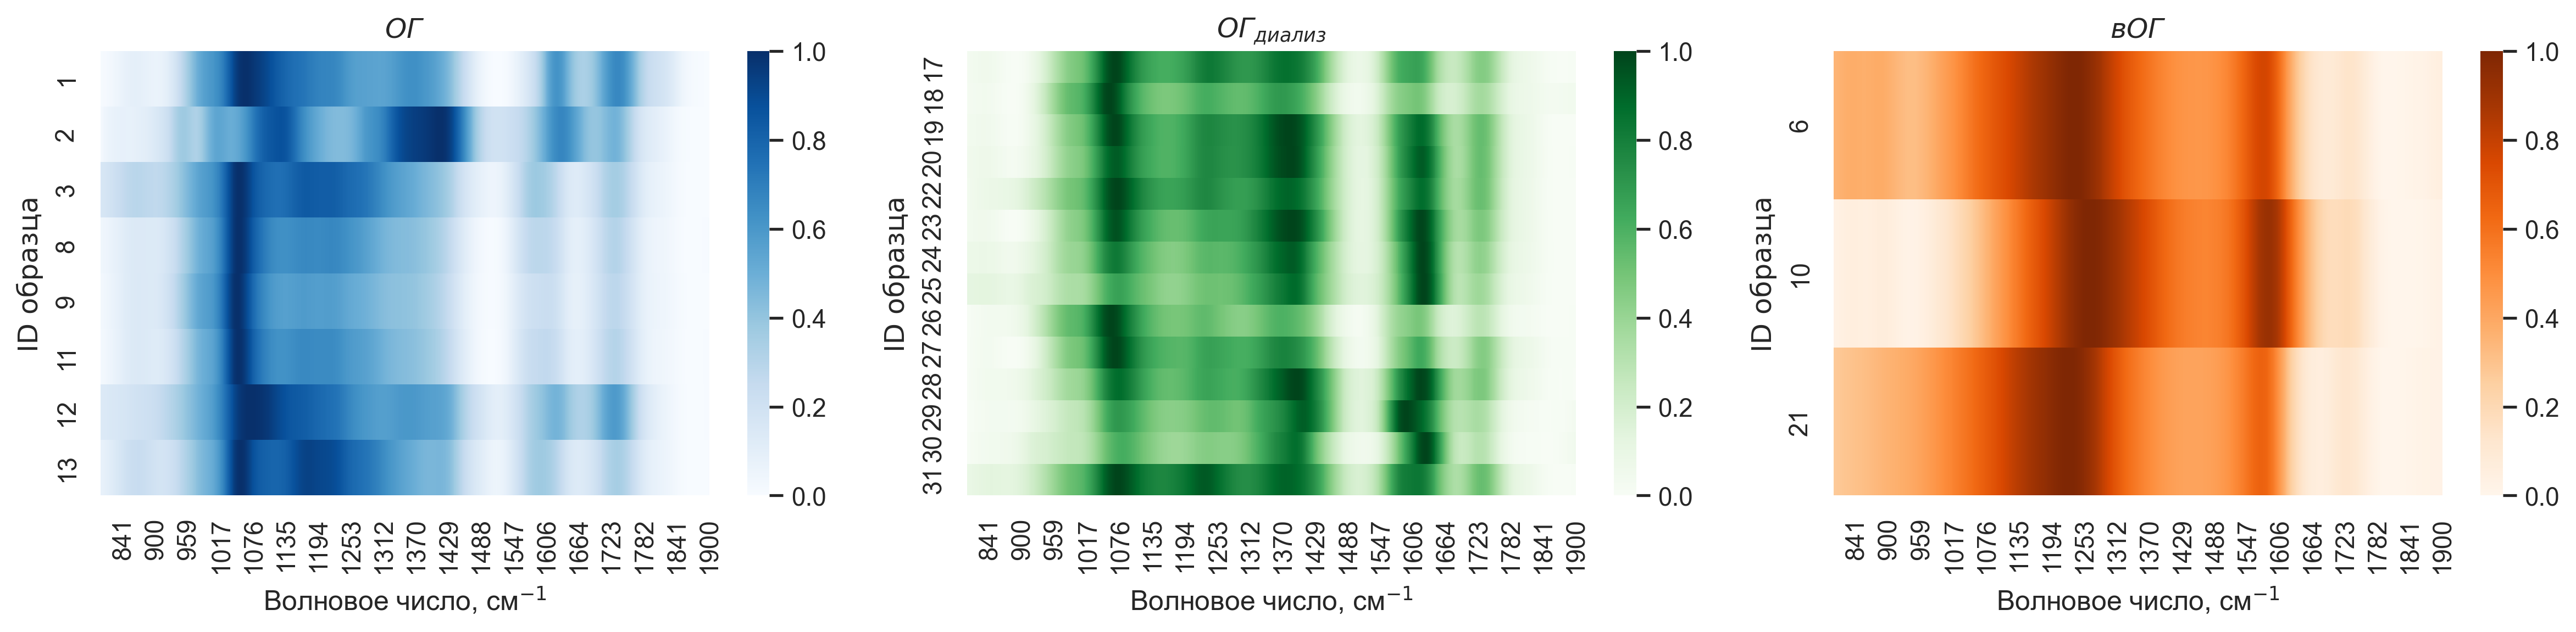

In [21]:
sns.set_theme()

nrows = 1
ncols = 3

fig = plt.figure(figsize=(12, 4), dpi=300)

for i, type in enumerate(unique_types):
    type_indexes = samples_description.loc[samples_description['Type'] == type].index
    temp_data = heatmap_data.loc[type_indexes]

    ax = plt.subplot(nrows, ncols, i+1)
    
    cmap = type_cmap[type]  # cmap = ['YlGnBu', 'PiYG', 'Reds', 'BuPu', 'rocket', 'flare', 'cubehelix', 'vlag', 'Spectral', 'icefire', 'Blues']
    
    heatmap = sns.heatmap(
        data=temp_data,
        cmap=cmap,
        ax=ax
    )
    
    ax.set_title(
        type_dict[type],
        fontstyle='normal',
        fontsize=fontsize,
        fontweight='bold',
    )
    
    ax.set_xlabel(
        'Волновое число, см$^{-1}$',
        fontstyle=fontstyle,
        fontsize=fontsize,
        labelpad=5
    )
    ax.set_ylabel(
        'ID образца',
        fontname='DejaVu Sans',
        fontsize=fontsize,
        fontstyle=fontstyle,
        labelpad=5
    )
    
    ax.invert_xaxis()
        
plt.tight_layout()

plt.savefig(f'{path_to_save}/heatmap_subplots_by_type.png', dpi=600)

plt.show()

## Analysis of spectra reproducibility

In [22]:
reproducibility_data = heatmap_data.copy()

print(reproducibility_data.shape)
reproducibility_data.head(3)

(25, 1141)


1900      1899      1898      1897      1896      1895      1894  \
1  0.000944  0.001362  0.001750  0.002112  0.002451  0.002770  0.003074   
2  0.000215  0.000213  0.000205  0.000192  0.000175  0.000155  0.000132   
3  0.002476  0.002405  0.002323  0.002230  0.002128  0.002017  0.001899   

       1893      1892      1891      1890      1889      1888      1887  \
1  0.003364  0.003646  0.003921  0.004193  0.004467  0.004744  0.005028   
2  0.000109  0.000085  0.000063  0.000042  0.000025  0.000011  0.000003   
3  0.001776  0.001648  0.001517  0.001383  0.001250  0.001116  0.000985   

       1886      1885      1884      1883      1882      1881      1881  \
1  0.005324  0.005633  0.005960  0.006308  0.006680  0.007079  0.007509   
2  0.000000  0.000004  0.000017  0.000039  0.000070  0.000113  0.000168   
3  0.000856  0.000732  0.000613  0.000501  0.000397  0.000303  0.000218   

       1880      1879      1878      1877  ...      824       823       822   \
1  0.007974  0.008476  0.009019  0.009606  ...  0.037121  0.035323  0.033560   
2  0.000236  0.000318  0.000415  0.000529  ...  0.072690  0.071565  0.070364   
3  0.000146  0.000087  0.000042  0.000013  ...  0.208237  0.205610  0.203011   

       821       820       819       818       817       816       815   \
1  0.031835  0.030152  0.028514  0.026926  0.025390  0.023910  0.022491   
2  0.069083  0.067721  0.066275  0.064743  0.063123  0.061413  0.059610   
3  0.200442  0.197910  0.195416  0.192967  0.190564  0.188213  0.185918   

       814       813       812       811       810       809       808   \
1  0.021135  0.019846  0.018627  0.017483  0.016417  0.015433  0.014533   
2  0.057713  0.055719  0.053626  0.051432  0.049135  0.046732  0.044221   
3  0.183681  0.181509  0.179403  0.177369  0.175410  0.173531  0.171735   

       807       806       805       804       803       802       801   \
1  0.013723  0.013004  0.012382  0.011859  0.011440  0.011127  0.010924   
2  0.041600  0.038868  0.036021  0.033058  0.029976  0.026773  0.023447   
3  0.170026  0.168408  0.166886  0.165463  0.164143  0.162931  0.161829   

       800   
1  0.010836  
2  0.019997  
3  0.160843  

[3 rows x 1141 columns]

### Visualization of *RSD* dependencies at 3 subplots

In [23]:
fontsize = 16
fontstyle='normal'

1900       1899       1898       1897       1896       1895  \
0     0.003248   0.003044   0.002852   0.002672   0.002506   0.002353   
1     0.003955   0.003845   0.003726   0.003598   0.003463   0.003323   
rsd  82.120000  79.150000  76.540000  74.270000  72.350000  70.800000   

          1894       1893       1892       1891       1890       1889  \
0     0.002215   0.002093   0.001988   0.001904   0.001840   0.001800   
1     0.003179   0.003032   0.002884   0.002736   0.002589   0.002445   
rsd  69.670000  69.030000  68.960000  69.590000  71.070000  73.590000   

          1888       1887       1886       1885        1884        1883  \
0     0.001784   0.001793   0.001828   0.001887    0.001970    0.002074   
1     0.002306   0.002173   0.002047   0.001929    0.001821    0.001725   
rsd  77.340000  82.520000  89.300000  97.820000  108.150000  120.240000   

           1882        1881        1881        1880        1879        1878  \
0      0.002199    0.002342    0.002502    0.002679    0.002870    0.003076   
1      0.001642    0.001572    0.001519    0.001482    0.001464    0.001466   
rsd  133.950000  148.950000  164.760000  180.720000  196.040000  209.860000   

           1877  ...       824        823        822        821        820   \
0      0.003296  ...   0.057738   0.057620   0.057515   0.057423   0.057344   
1      0.001489  ...   0.100842   0.098871   0.096912   0.094967   0.093038   
rsd  221.410000  ...  57.260000  58.280000  59.350000  60.470000  61.630000   

          819        818        817        816        815        814   \
0     0.057275   0.057216   0.057167   0.057126   0.057093   0.057066   
1     0.091128   0.089238   0.087371   0.085530   0.083715   0.081929   
rsd  62.850000  64.120000  65.430000  66.790000  68.200000  69.650000   

          813        812        811        810        809        808   \
0     0.057046   0.057032   0.057023   0.057020   0.057022   0.057031   
1     0.080175   0.078455   0.076770   0.075123   0.073516   0.071951   
rsd  71.150000  72.690000  74.280000  75.900000  77.560000  79.260000   

          807        806        805        804        803        802   \
0     0.057045   0.057068   0.057099   0.057140   0.057193   0.057261   
1     0.070431   0.068957   0.067532   0.066158   0.064836   0.063570   
rsd  80.990000  82.760000  84.550000  86.370000  88.210000  90.080000   

          801        800   
0     0.057346   0.057452  
1     0.062362   0.061212  
rsd  91.960000  93.860000  

[3 rows x 1141 columns]

1900       1899       1898       1897       1896       1895  \
0     0.014558   0.014501   0.014426   0.014334   0.014226   0.014103   
1     0.035647   0.035431   0.035185   0.034910   0.034606   0.034275   
rsd  40.840000  40.930000  41.000000  41.060000  41.110000  41.150000   

          1894       1893       1892       1891       1890       1889  \
0     0.013966   0.013816   0.013654   0.013482   0.013301   0.013112   
1     0.033918   0.033537   0.033132   0.032704   0.032256   0.031788   
rsd  41.170000  41.200000  41.210000  41.220000  41.240000  41.250000   

          1888       1887       1886       1885       1884       1883  \
0     0.012917   0.012717   0.012514   0.012308   0.012101   0.011895   
1     0.031302   0.030797   0.030277   0.029742   0.029193   0.028632   
rsd  41.270000  41.290000  41.330000  41.380000  41.450000  41.550000   

          1882       1881       1881       1880       1879       1878  \
0     0.011691   0.011490   0.011293   0.011101   0.010916   0.010738   
1     0.028059   0.027476   0.026884   0.026285   0.025679   0.025068   
rsd  41.670000  41.820000  42.010000  42.230000  42.510000  42.840000   

          1877  ...       824        823        822       821        820   \
0     0.010568  ...   0.168508   0.168457   0.168402   0.16834   0.168272   
1     0.024452  ...   0.239623   0.238842   0.238040   0.23722   0.236382   
rsd  43.220000  ...  70.320000  70.530000  70.740000  70.96000  71.190000   

          819        818        817        816        815        814   \
0     0.168197   0.168115   0.168023   0.167923   0.167812   0.167691   
1     0.235528   0.234659   0.233776   0.232880   0.231973   0.231055   
rsd  71.410000  71.640000  71.870000  72.110000  72.340000  72.580000   

          813        812        811        810        809        808   \
0     0.167559   0.167414   0.167257   0.167087   0.166903   0.166703   
1     0.230129   0.229195   0.228254   0.227308   0.226358   0.225405   
rsd  72.810000  73.040000  73.280000  73.510000  73.730000  73.960000   

          807        806        805        804        803        802   \
0     0.166488   0.166258   0.166010   0.165744   0.165461   0.165158   
1     0.224451   0.223496   0.222543   0.221591   0.220642   0.219699   
rsd  74.180000  74.390000  74.600000  74.800000  74.990000  75.170000   

          801        800   
0     0.164835   0.164492  
1     0.218761   0.217830  
rsd  75.350000  75.510000  

[3 rows x 1141 columns]

1900        1899        1898        1897        1896        1895  \
0      0.016847    0.016408    0.015991    0.015594    0.015215    0.014854   
1      0.013319    0.012974    0.012621    0.012262    0.011899    0.011532   
rsd  126.490000  126.470000  126.700000  127.170000  127.870000  128.800000   

           1894        1893        1892        1891        1890        1889  \
0      0.014508    0.014175    0.013855    0.013547    0.013248    0.012959   
1      0.011163    0.010793    0.010422    0.010053    0.009686    0.009322   
rsd  129.960000  131.340000  132.940000  134.760000  136.780000  139.020000   

           1888        1887        1886        1885        1884        1883  \
0      0.012678    0.012404    0.012136    0.011874    0.011618    0.011367   
1      0.008963    0.008609    0.008263    0.007925    0.007595    0.007277   
rsd  141.450000  144.070000  146.870000  149.840000  152.960000  156.210000   

           1882        1881        1881        1880        1879        1878  \
0      0.011120    0.010878    0.010639    0.010405    0.010175    0.009949   
1      0.006969    0.006675    0.006395    0.006129    0.005880    0.005648   
rsd  159.550000  162.960000  166.380000  169.770000  173.050000  176.140000   

           1877  ...       824        823        822        821        820   \
0      0.009727  ...   0.033739   0.033770   0.033806   0.033845   0.033889   
1      0.005435  ...   0.056360   0.055761   0.055141   0.054501   0.053843   
rsd  178.970000  ...  59.860000  60.560000  61.310000  62.100000  62.940000   

          819        818        817        816        815        814   \
0     0.033938   0.033991   0.034049   0.034113   0.034182   0.034256   
1     0.053168   0.052478   0.051774   0.051058   0.050331   0.049594   
rsd  63.830000  64.770000  65.770000  66.810000  67.910000  69.070000   

          813        812        811        810        809        808   \
0     0.034337   0.034423   0.034516   0.034616   0.034723   0.034837   
1     0.048849   0.048098   0.047342   0.046582   0.045819   0.045056   
rsd  70.290000  71.570000  72.910000  74.310000  75.780000  77.320000   

          807        806        805        804        803        802   \
0     0.034958   0.035088   0.035226   0.035372   0.035529   0.035694   
1     0.044294   0.043534   0.042777   0.042026   0.041281   0.040544   
rsd  78.920000  80.600000  82.350000  84.170000  86.060000  88.040000   

          801        800   
0     0.035870   0.036057  
1     0.039816   0.039100  
rsd  90.090000  92.220000  

[3 rows x 1141 columns]

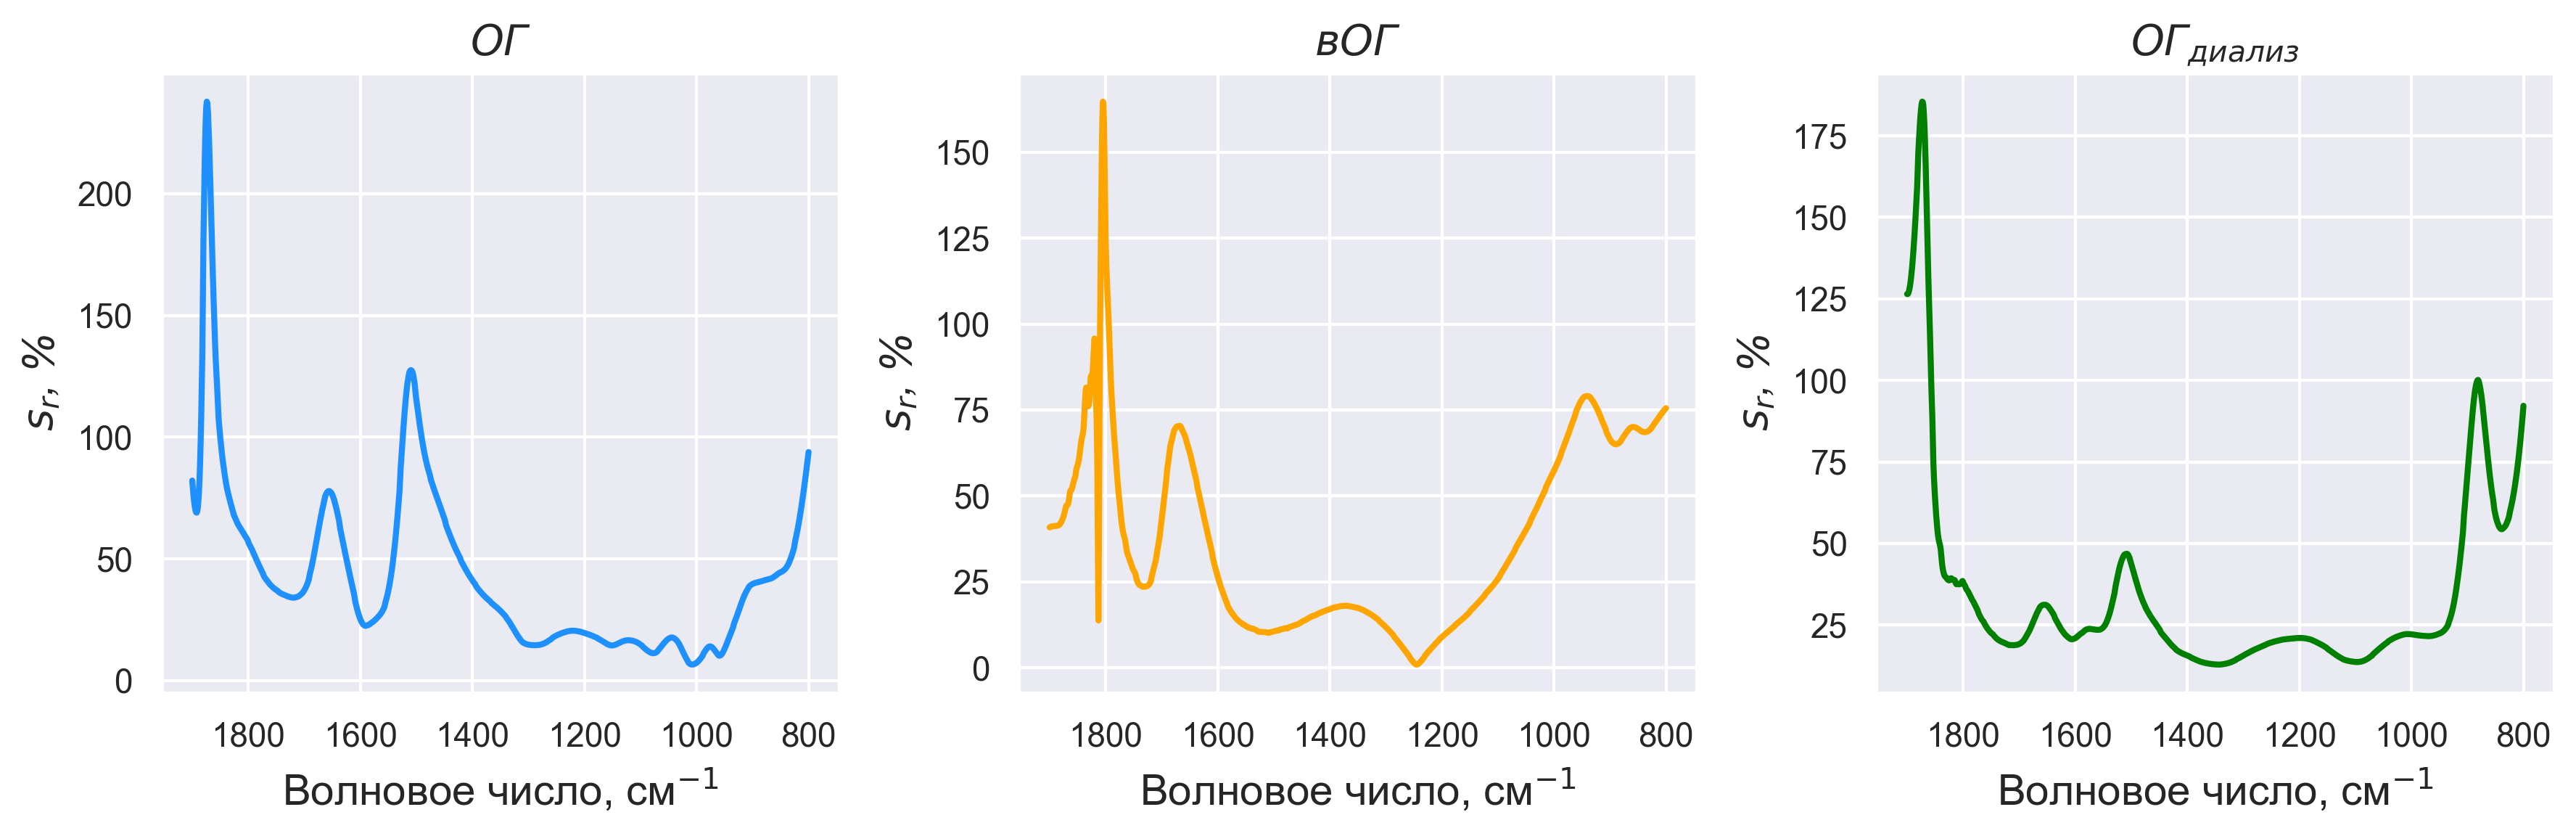

In [70]:
sns.set_theme()

nrows = 1
ncols = 3

fig = plt.figure(figsize=(12, 4), dpi=300)

for i, type in enumerate(unique_types):
    type_indexes = samples_description.loc[samples_description['Type'] == type].index
    temp_data = reproducibility_data.loc[type_indexes]

    repr_arr = round(temp_data.std() / temp_data.mean() * 100, 2)
    repr_df = pd.DataFrame(repr_arr, columns=['rsd'])

    display(pd.concat([temp_data.std(), temp_data.mean(), repr_df], axis=1).T)

    color = type_color_dict[type]

    ax = plt.subplot(nrows, ncols, i+1)

    sns.lineplot(
        data=repr_df,
        x=repr_df.index,
        y='rsd',
        color=color,
        linewidth=2.0,
        # label=type
        ax=ax
    )

    ax.set_title(
        type_dict[type],
        fontstyle='normal',
        fontsize=fontsize,
        fontweight='bold',
    )
    
    ax.set_xlabel(
        'Волновое число, см$^{-1}$',
        fontstyle='normal',
        fontsize=fontsize,
        labelpad=5,
    )
    
    ax.set_ylabel(
        '$s_{r}$, %',
        fontstyle='italic',
        fontsize=fontsize,
        labelpad=5,
        rotation=90,
    )
    
    ax.invert_xaxis()

    ax.xaxis.set_major_locator(ticker.MultipleLocator(200))

plt.tight_layout()

plt.savefig(f'{path_to_save}/rsd_dependence_3_subplots.png', dpi=600)

plt.show()

### Visualization of *RSD* dependence at one plot

In [25]:
fontsize = 14
fontstyle='normal'

y_scale = 'linear'  # linear, log

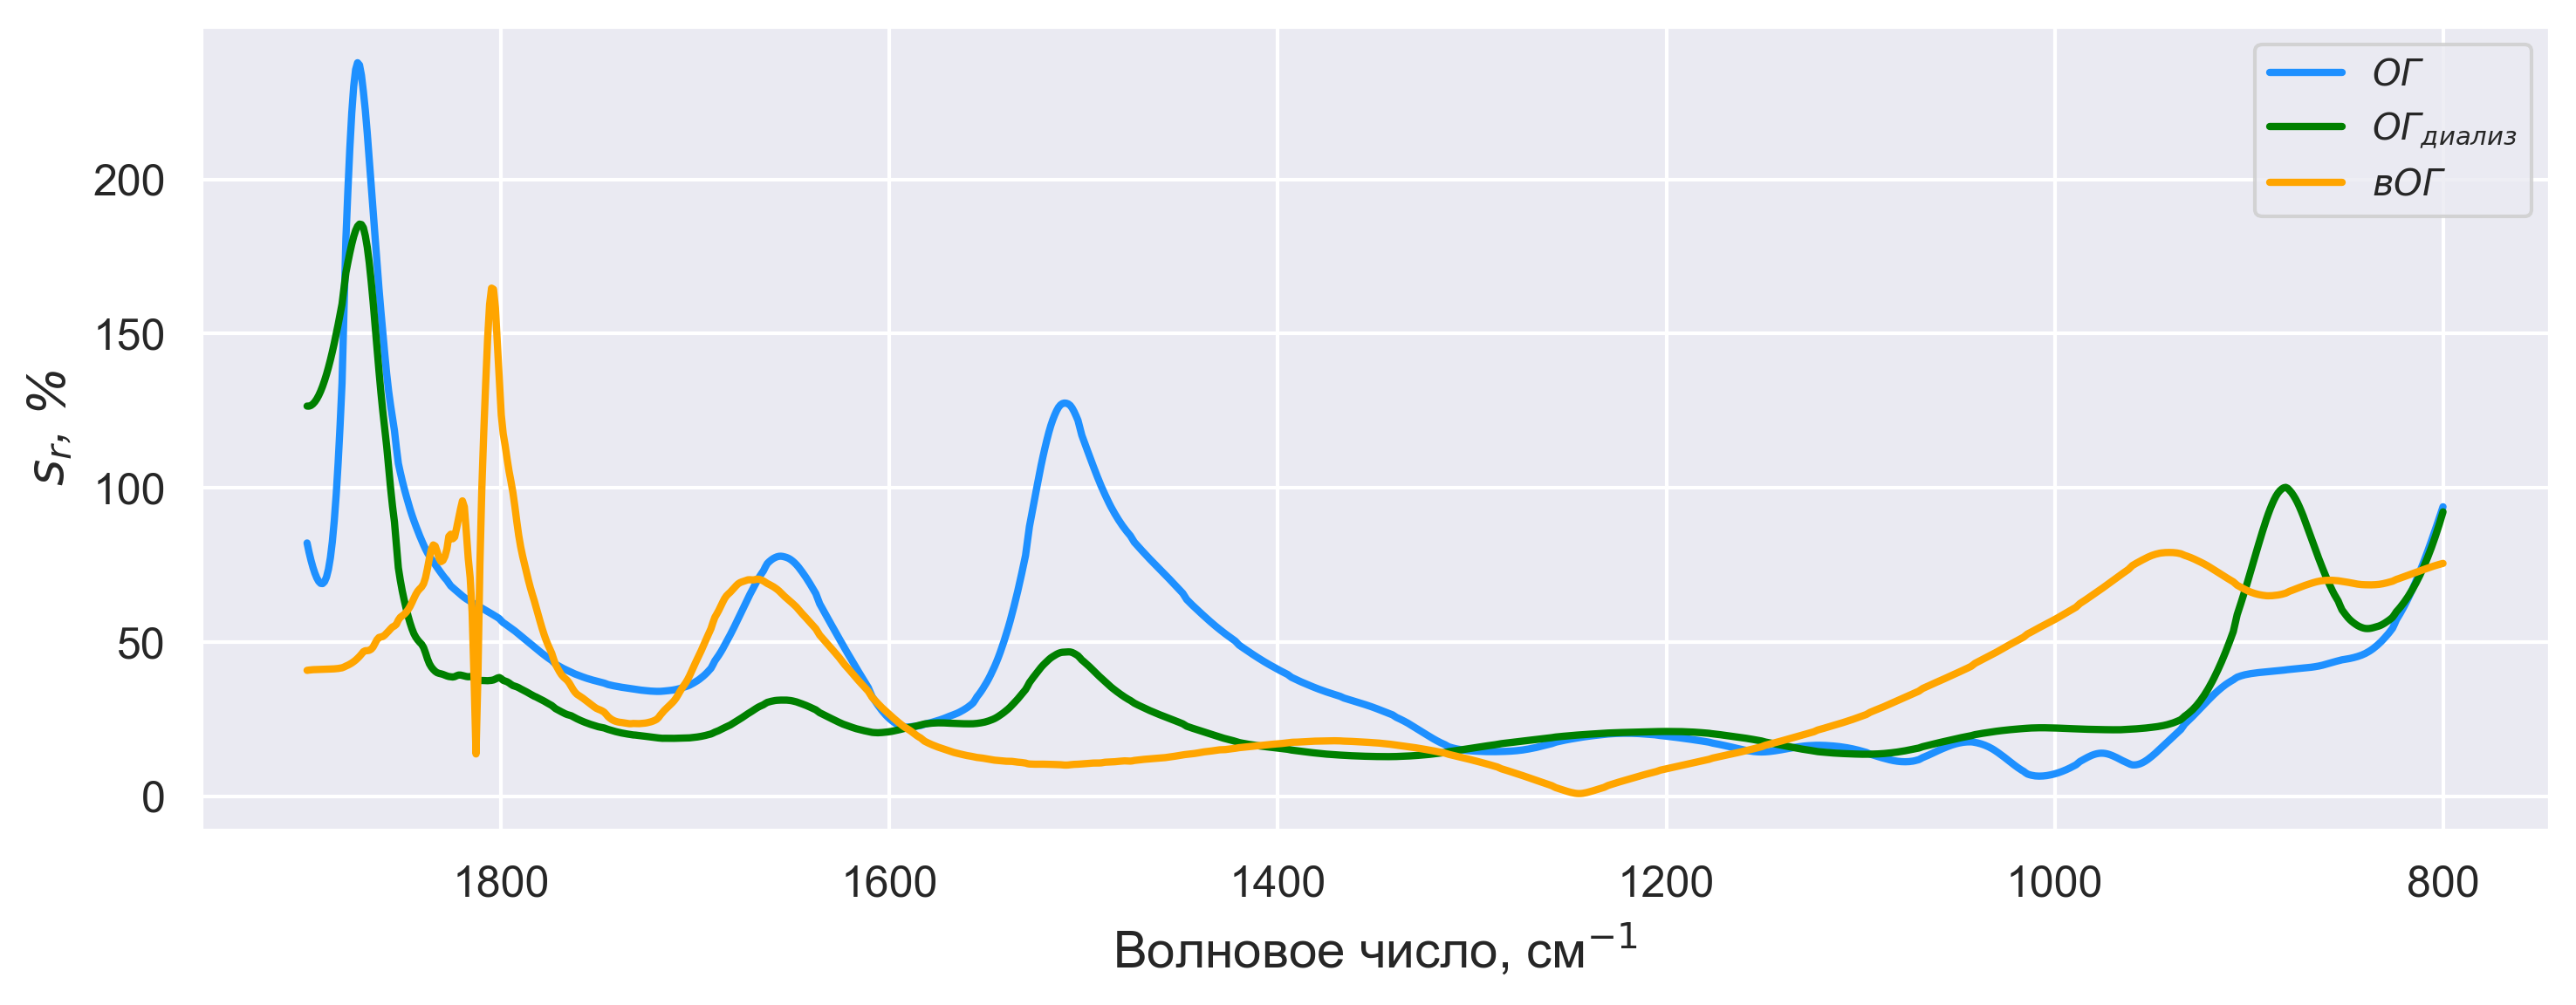

In [26]:
fig = plt.figure(figsize=(10, 4), dpi=300)
ax = fig.gca()

for type in unique_types:
    type_indexes = samples_description.loc[samples_description['Type'] == type].index
    temp_data = reproducibility_data.loc[type_indexes]

    repr_arr = round(temp_data.std() / temp_data.mean() * 100, 2)
    repr_df = pd.DataFrame(repr_arr, columns=['rsd'])

    sns.set_theme()

    color = type_color_dict[type]
    label = type_dict[type]
    
    sns.lineplot(
        data=repr_df,
        x=repr_df.index,
        y='rsd',
        color=color,
        linewidth=2.0,
        label=label,
        ax=ax
    )
    
    ax.set_xlabel(
        'Волновое число, см$^{-1}$',
        fontstyle='normal',
        fontsize=fontsize,
        labelpad=5,
    )
    
    ax.set_ylabel(
        '$s_{r}$, %',
        fontstyle='italic',
        fontsize=fontsize,
        labelpad=5,
        rotation=90,
    )
    ax.tick_params(axis='both', which='major', labelsize=fontsize-2)

    ax.set_yscale(y_scale)
    
    ax.invert_xaxis()

    plt.tight_layout()

ax.legend(fontsize=10)

plt.savefig(f'{path_to_save}/rsd_dependence_1_plot.png', dpi=600)
          
plt.show()

### Numerically statistics of reproducibility

In [27]:
unique_types = samples_description['Type'].unique()

repr_df = pd.DataFrame()

for type in unique_types:
    type_indexes = samples_description.loc[samples_description['Type'] == type].index
    temp_data = reproducibility_data.loc[type_indexes]

    repr_arr = round(temp_data.std() / temp_data.mean() * 100, 2)
    tmp_repr_df = pd.DataFrame(repr_arr, columns=['rsd'])

    tmp_repr_df['Type'] = type

    repr_df = pd.concat([repr_df, tmp_repr_df], axis=0)

print(repr_df.shape)
repr_df.head(3)

(3423, 2)


rsd  Type
1900  82.12  $GO$
1899  79.15  $GO$
1898  76.54  $GO$

In [28]:
repr_df.groupby('Type').agg('mean').T

Type       $GO$   $GO_{d}$      $rGO$
rsd   43.079956  33.548195  37.341218